## Wednesday, 9/4: Data Analytics for Economists




### Sit up front! 
### Open up your laptop. 
* Go to kimjruhl.com
* 'Teaching' > 'Data Analytics'
* In 'Week 0' open 'introduction slides'

### Outline:
1. Data analysis examples: Thinking about data
2. Why Python? Why not Excel?
2. Syllabus stuff

### Before we get started...

* Me: Prof. Kim Joseph Ruhl


* School: BS Bowling Green State University (Ohio); PhD U. Minnesota
    * Studied computer science and economics


* Jobs: Minneapolis FRB; U. Texas Austin; NYU Stern Business School; Penn State


* Research: International finance, macro, trade, multinational firms
    * Data + computational models
    * If you are curious: [kimjruhl.com/research](http://kimjruhl.com/research)


* Not work: Fly fishing, hiking, robots, home brewing 


### ... and a word on laptops
* This is a laptops-open course


* Resist the urge to view material not related to the course


## Introduction: Thinking about data. 

This course is about using data and 'the right kind of analysis' to answer questions. 

1. What is the question we are trying to answer? Throughout the course (and the rest of your lives) you should be generating questions. 
2. Data: Where does it come from? What questions can it answer?
3. What is 'the right kind of analysis?' Often, this is creating a visualization (e.g., a plot, a map) to convey information. Using the right kind of visualization is part of the analysis. 

Let's look at some visualizations:

1. Gapminder
2. Voting in Wisconsin
3. The jobs report

### Gapminder
Go to [https://www.gapminder.org/tools/#$chart-type=bubbles] (open in new tab)

1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?

### Voting in Wisconsin

Go to [https://www.nytimes.com/elections/results/wisconsin](https://www.nytimes.com/elections/results/wisconsin) (new tab) and focus on the presidential results

Take 5 minutes (work with those around you) and try to answer:
1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?

### The employment situation

Published the first Friday of each month. Find it at [https://www.bls.gov](https://www.bls.gov), by choosing from the 'Economic Releases' menu: 'Employment and Unemployment.'

Review definitions:
1. Employed

2. Unemployed

3. Not in the labor force

Go to [https://projects.fivethirtyeight.com/jobs-day](https://projects.fivethirtyeight.com/jobs-day) (new tab)and scroll down to the figure titled 'The unemployment rate' and the figures that follow. 

Take 5 minutes (work with those around you) and try to answer:
1. What does the visualization tell you? 
2. What kind of data are used? Where are they from?
3. What else would you like to know?
___


## Why Python?

We want to:
* Work with large(ish) datasets
* Manage numeric data and 'string' data
* Have control over our figures' appearance 
* Be transparent: Can our work be replicated?
* Automate repetitive stuff

Python gives us
* A reasonably fast language
* Great support for numeric and string manipulation
* Many plotting options
* Ways to create well-documented analysis
* Automation

 

### An example
Let's plot the dollar-yuan exchange rate to get feel for what we can do with Python. (I do not expect you to follow all of this today!) 

We will get the data from the [St. Louis FRB FRED](https://fred.stlouisfed.org/) database. We will work with FRED often. It is an easy place to get economic data.

In [6]:
# Do some preliminary things to get Python set up.

# Import needed packages
import pandas as pd                            # the workhorse data package

# There is an issue with datareader. The line below is the quick fix. Supposed to be fixed in reader version 0.7. 
# See https://stackoverflow.com/questions/50394873/
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web           # for FRED data calls
import matplotlib.pyplot as plt                # for plots
import datetime as dt                          # for dates

import pandas.plotting._converter as pandacnv
pandacnv.register()

# IPython command to include plots in the notebook
%matplotlib inline

In [7]:
# Create datetime objects to hold the begin and end dates
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2019, 7, 1)

# Get monthly Yuan-per-dollar exchange rate. 'fred' tells the data reader to use the FRED repository.
# 'EXCHUS' is the name of the data series in FRED. You can find the series codes (names) on the FRED website.
exchus = web.DataReader('EXCHUS', 'fred', start, end)

# Print out the first 3 observations.
print(exchus.head(3))

# Print out the last 3 observations.
print(exchus.tail(3))

            EXCHUS
DATE              
1990-01-01  4.7339
1990-02-01  4.7339
1990-03-01  4.7339
            EXCHUS
DATE              
2019-05-01  6.8519
2019-06-01  6.8977
2019-07-01  6.8775


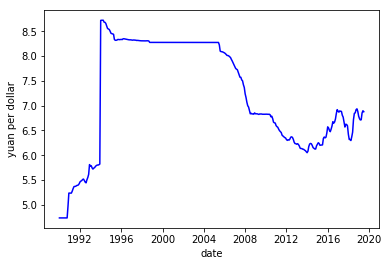

In [8]:
# The basic plotting command. The 'b-' means 'make the line blue.'
plt.plot(exchus.index, exchus['EXCHUS'], 'b-' )
plt.xlabel('date')                  # neccessary?
plt.ylabel('yuan per dollar')
plt.savefig('ch_us_exrate.pdf')     # Save the figure as a pdf. Good for including in documents.


That worked pretty well! We could continue to customize the plot by adding data markers, changing colors, adding legends, etc. We will leave that stuff for later. 

We could have made that figure in Excel. Did Python buy us much? In this case, maybe not, although I would argue that 
```python
exchus = web.DataReader('EXCHUS', 'fred', start, end)
```
is easier than going to FRED, downloading the data, getting set up in a workbook and then plotting. 






### Automating work in Python

What if we need to make several plots? 

Python just requires a few extra lines of code. Again, don't worry about the details, we are just taking a quick look at what Python can do for us. All of this will make more sense later. 


In [9]:
# Make list with the names of the data we would like to plot.
ctry_list = ['EXCHUS', 'EXJPUS', 'EXCAUS']      # China, Japan, Canada

# Make a list of the units for the y axis.
units = ['yuan per dollar', 'yen per dollar', 'Canadian dollar per U.S. dollar' ]

#Read the data. Pass a list of codes rather a single string.
ex_many = web.DataReader(ctry_list, 'fred', start, end)
print(ex_many.head(3))

            EXCHUS    EXJPUS  EXCAUS
DATE                                
1990-01-01  4.7339  144.9819  1.1720
1990-02-01  4.7339  145.6932  1.1965
1990-03-01  4.7339  153.3082  1.1800


To plot, we loop over the list of variable names (and the units) and plot them. 

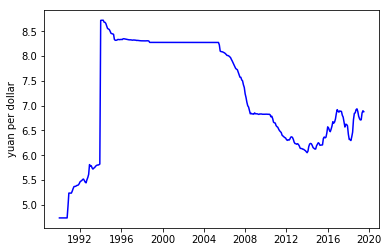

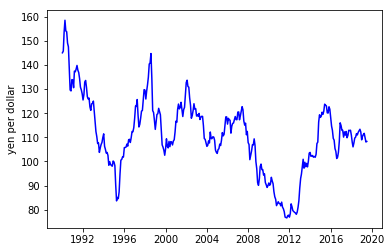

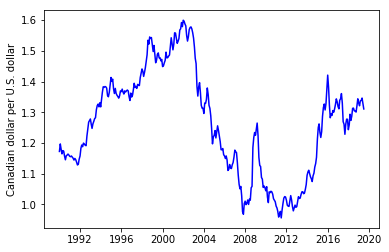

In [10]:
for ctry, unit in zip(ctry_list, units) :
    plt.figure()
    plt.plot(ex_many.index, ex_many[ctry], 'b-')
    plt.ylabel(unit)

## Course information

* This information is in the syllabus
* Ask questions as we go

## Expectations
* Prerequisites: Graduate standing
  * Comfortable with statistics, econometrics
  * NOT a prerequisite: coding experience
  

* Class is a mixture of **economics** and
  * Learning to pose questions and think in terms of data
  * Learning about data sources and how to use them
  * Learning to program (as a means to an end)
  * Learning to analyze data and present it in useful ways
  
  
 * Attendance
   * Not mandatory, but expected
   * Textbook is a reference
   * Work through problems in class
   * Chance to ask questions and make comments

## Course materials
* Reference text: *Python for Data Analysis* by Wes McKinney (2nd ed)
  * This more of a reference than a textbook
  * $30 on Amazon.com; ebook versions available
  
  
* Besides the text: Lots (and lots and lots) of free online guides, tutorials, and references


* Course webpage: [http://kimjruhl.com/data-analysis/](http://kimjruhl.com/data-analysis/)
  * Everything you need is here
  * Thematic and week-by-week schedule
  * Links to data and resources
  * Constantly being improved

## Canvas
* Used for assignments and announcements


* My first time using Canvas (at students' request)


* Did you receive an announcement from me? 

## Grades
deliverable | weight in final grade
------------- | ---
Student survey | 1%
Best 4 coding practices | 4%
Exam 1 | 20%
Exam 2| 20%
Project preproposal | 10%
Project proposal | 10%
Project | 35%


* **Coding practice:** Five assignments meant to help you practice coding. Graded check, check+, or check-. Check or check+ earns full 1%. Check- earns 0%. Lowest score dropped. 


* **Exams:** In-class exam (open book, open internet). Meant to test basic coding skills that should be routine. I will circulate a list of topics before the exam. 

* **Project:** This is a chance to develop a piece of data analysis that showcases what you have learned in class. 


* Work in group of up to three students. 


* Two final deliverables
  1. A 3-page professional report that presents your analysis to someone who is interested in the results, but not the technical details
  2. A well-documented Jupyter notebook with the technical details
  
  
* Two intermediate deliverables
  1.  **Project preproposal** (one Jupyter notebook). Clear statement of question. Brief discussion of the data. One relevant figure or statistic that shows your team has the data loaded and ready for analysis. 
  2.  **Project proposal** (one Jupyter notebook). Clear statement of question. Preliminary analysis. Work plan. The proposal goal is to make sure that you and I are on the same page before you do the hard work!

## Attendance, again

* No attendance grade, but you really should be here
* Exams: If religious or university related, notify me ASAP
  
## Important dates

* Survey due: September 6
* Coding practices due: September 27, October 11, November 1 & 15, December 6 
* Exams: October 16, November 20
* Project preproposal: November 8
* Project proposal: November 29
* Project: December 13

## Need some help?

* Come see me (office hours T:2:30-3:30, R:10:00-11:00)


* Send me email: ruhl2@wisc.edu


* Google. Seriously! 

## Technical details
* We will be working on Winstat
  * Windows servers that are pre-loaded (and managed!) by the Social Sciences Computing Cooperative (SSCC)
  * MA students and a few other already have accounts. Do you know your login? If not, email Caitlin Tefft (ctefft@ssc.wisc.edu) for help
  * If you have never had a SSCC account, check your email for details. 
  * On Monday, we will go through connecting to winstat. If you are feeling up to it, go to [https://ssc.wisc.edu/sscc/winstat.htm](https://ssc.wisc.edu/sscc/winstat.htm) and see if you can get up and running.
  